# Import Library

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [126]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [127]:
# rename the Luas Tanah (m2) & Luas Bangunan (m2) & Harga Penawaran (dari Owner) & Lebar Jalan Depan Rumah (ROW) column
df = df.rename(columns={"Luas Tanah (m2)": "Luas Tanah", "Luas Bangunan (m2)": "Luas Bangunan",
                        "Harga Penawaran (dari Owner)" : "Harga Penawaran", "Lebar Jalan Depan Rumah (ROW)" : "Lebar Jalan Depan Rumah"})
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [128]:
# describe data
df.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [129]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Area Category            308 non-null    object
 1   Nama Daerah              308 non-null    object
 2   Luas Tanah               308 non-null    int64 
 3   Luas Bangunan            308 non-null    int64 
 4   Jumlah Kamar             308 non-null    int64 
 5   Jumlah Kamar Mandi       308 non-null    int64 
 6   Tingkat/Lantai           308 non-null    int64 
 7   Harga Penawaran          308 non-null    int64 
 8   Terjual/Belum            308 non-null    object
 9   Arah Hadap Rumah         308 non-null    object
 10  Posisi Rumah             308 non-null    object
 11  Lebar Jalan Depan Rumah  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


# Data Transformation

In [130]:
# Encoding categorical columns
le = LabelEncoder()
categorical_cols = ['Nama Daerah', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,Standard,11,240,300,4,3,2,3500000000,0,3,2,0
1,Below Standard,100,30,60,2,1,2,287799000,0,3,2,1
2,Standard,48,170,170,5,4,2,2699999999,0,1,0,0
3,Sangat Premium,48,187,250,5,5,2,3100000000,0,3,2,0
4,Premium,48,350,600,5,5,2,5000000000,0,0,2,0


In [131]:
# Check available columns
df.columns

Index(['Area Category', 'Nama Daerah', 'Luas Tanah', 'Luas Bangunan',
       'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ',
       'Harga Penawaran', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah',
       'Lebar Jalan Depan Rumah'],
      dtype='object')

In [132]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy()

# Fit and transform the selected numerical columns
df_scaled = sc.fit_transform(df[['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'Harga Penawaran']])

df_scaled = pd.DataFrame(df_scaled, columns=['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'Harga Penawaran'])
df_scaled.head()


,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723


In [133]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02
mean,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00
min,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01
25%,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01
50%,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01
75%,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02
max,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01


## Silhouette Score

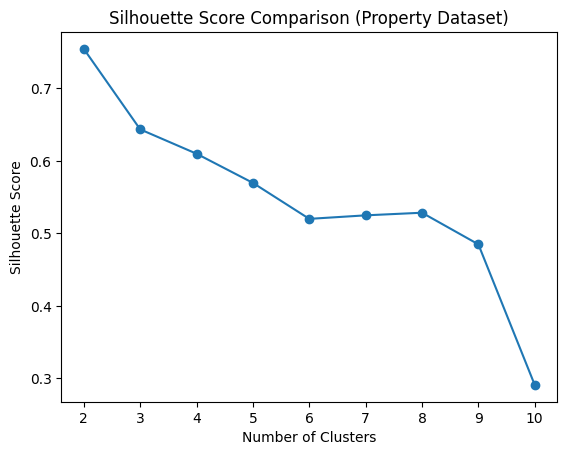

In [134]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single', metric='euclidean')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Comparison (Property Dataset)")
plt.show()


## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


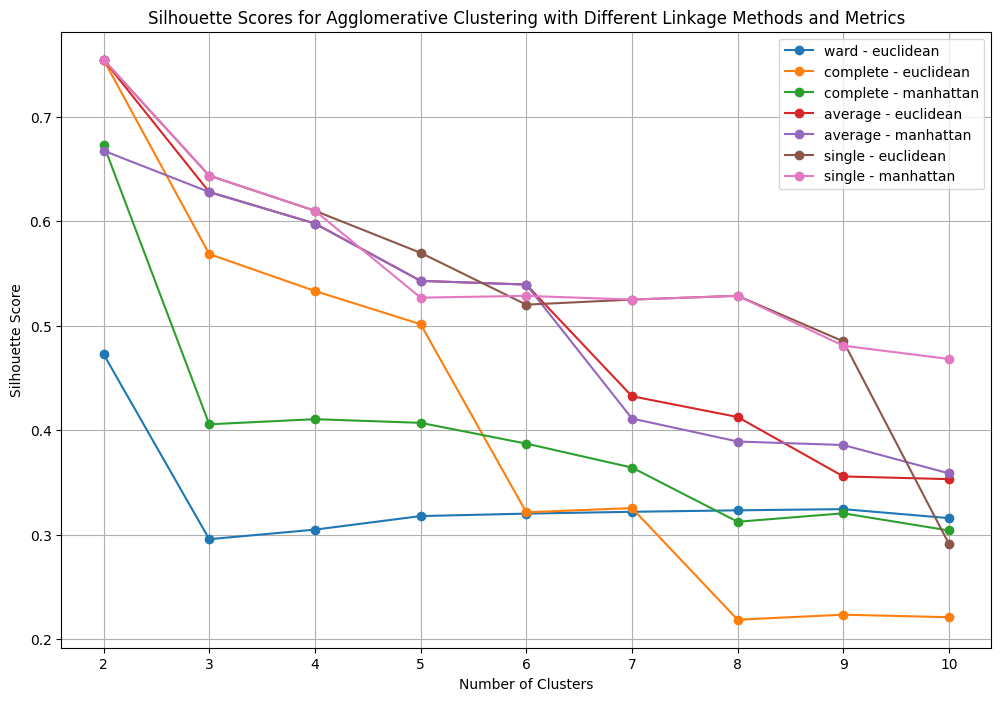

Best Silhouette Score: 0.7543687625770334
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [135]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

Error encountered for Linkage=ward, Metric=single: The 'metric' parameter of AgglomerativeClustering must be a str among {'dice', 'precomputed', 'correlation', 'nan_euclidean', 'manhattan', 'canberra', 'rogerstanimoto', 'minkowski', 'matching', 'braycurtis', 'yule', 'wminkowski', 'jaccard', 'sqeuclidean', 'cityblock', 'hamming', 'euclidean', 'l2', 'sokalsneath', 'cosine', 'seuclidean', 'haversine', 'mahalanobis', 'chebyshev', 'russellrao', 'sokalmichener', 'l1'} or a callable. Got 'single' instead.
Skipping ward with single.
Skipping Ward linkage with Manhattan metric (not supported).
Error encountered for Linkage=complete, Metric=single: The 'metric' parameter of AgglomerativeClustering must be a str among {'dice', 'precomputed', 'correlation', 'nan_euclidean', 'manhattan', 'canberra', 'rogerstanimoto', 'minkowski', 'matching', 'braycurtis', 'yule', 'wminkowski', 'jaccard', 'sqeuclidean', 'cityblock', 'hamming', 'euclidean', 'l2', 'sokalsneath', 'cosine', 'seuclidean', 'haversine', 'm

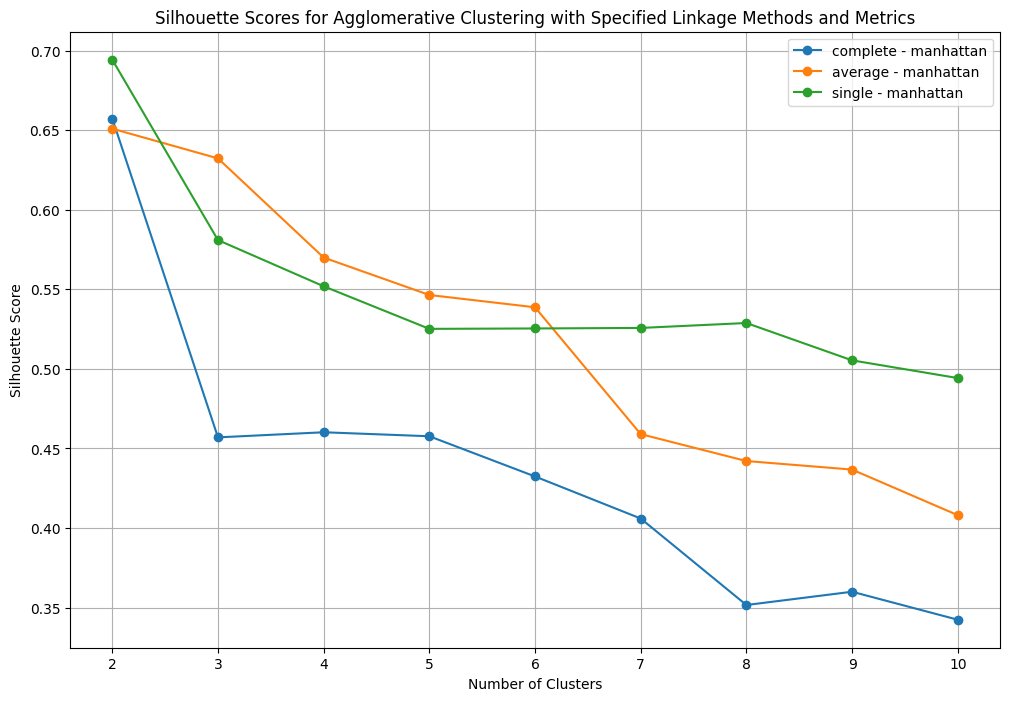


--- Best Result from Successful Runs ---
Best Silhouette Score: 0.6943661831650816
Optimal Number of Clusters: 2
Optimal Linkage Method: single
Optimal Metric: manhattan


In [136]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- ASUMSI: df_scaled adalah Data Numerik (sudah diskalakan) ---
# Tambahkan dummy data jika df_scaled belum didefinisikan untuk memastikan kode berjalan
try:
    df_scaled
except NameError:
    print("Warning: df_scaled not found. Using dummy data for demonstration.")
    data = np.random.rand(100, 5)
    df_scaled = pd.DataFrame(data)

# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['single', 'manhattan'] # Diubah sesuai permintaan Anda

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Peringatan: Blok if ini sekarang akan memunculkan error karena
        # 'single' bukan metrik yang didukung, dan 'ward' tidak boleh di-skip
        # dengan metrik standar lainnya (seperti 'manhattan').
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        try:
            for n_clusters in range_n_clusters:
                # Blok ini AKAN GAGAL ketika metric == 'single'
                agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
                y_agglo = agglo.fit_predict(df_scaled)

                # Gunakan metrik yang sedang diuji untuk menghitung skor
                silhouette_avg = silhouette_score(df_scaled, y_agglo, metric=metric)
                current_scores.append(silhouette_avg)

                if silhouette_avg > best_silhouette_score:
                    best_silhouette_score = silhouette_avg
                    best_n_clusters = n_clusters
                    best_linkage = linkage_method
                    best_metric = metric

            results_for_plotting.append({
                'linkage': linkage_method,
                'metric': metric,
                'scores': current_scores
            })

        except ValueError as e:
            # Menangani error ketika metrik tidak didukung (yaitu 'single')
            print(f"Error encountered for Linkage={linkage_method}, Metric={metric}: {e}")
            print(f"Skipping {linkage_method} with {metric}.")


# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
# Memastikan hanya hasil yang berhasil yang di-plot
if results_for_plotting:
    for result in results_for_plotting:
        plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Scores for Agglomerative Clustering with Specified Linkage Methods and Metrics")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("\nNo successful results to plot (Mungkin semua metrik non-standar gagal).")


print(f"\n--- Best Result from Successful Runs ---")
print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Dendogram Visualization

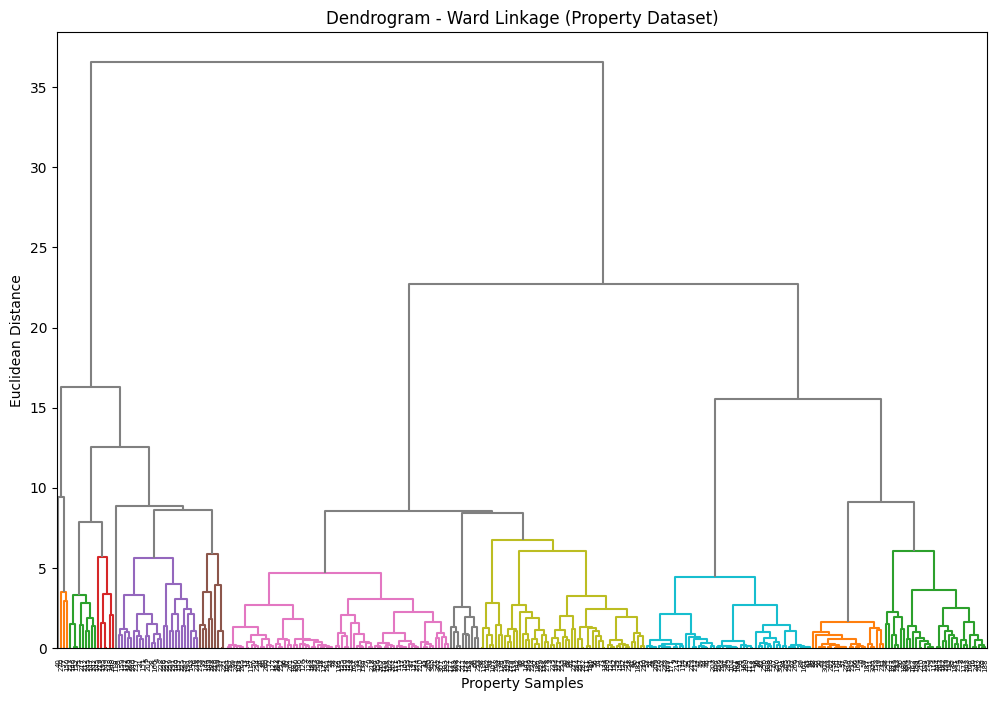

In [137]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(12, 8))
dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram - Ward Linkage (Property Dataset)")
plt.xlabel("Property Samples")
plt.ylabel("Euclidean Distance")
plt.show()


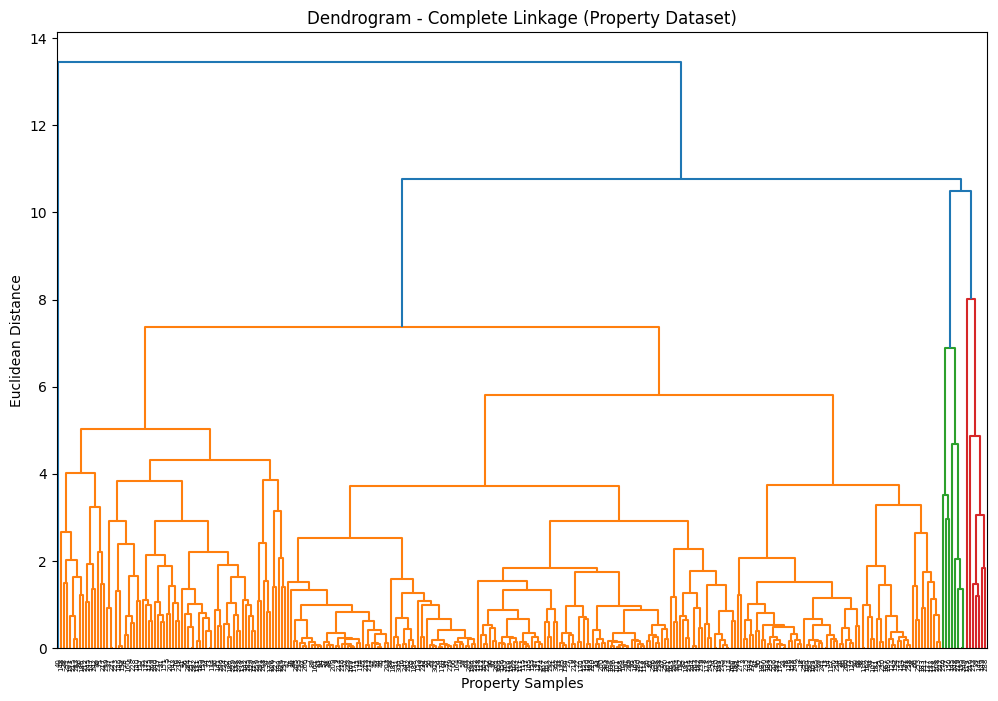

In [138]:
# Complete Linkage Method
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(12, 8))
dendrogram(linked)
plt.title("Dendrogram - Complete Linkage (Property Dataset)")
plt.xlabel("Property Samples")
plt.ylabel("Euclidean Distance")
plt.show()


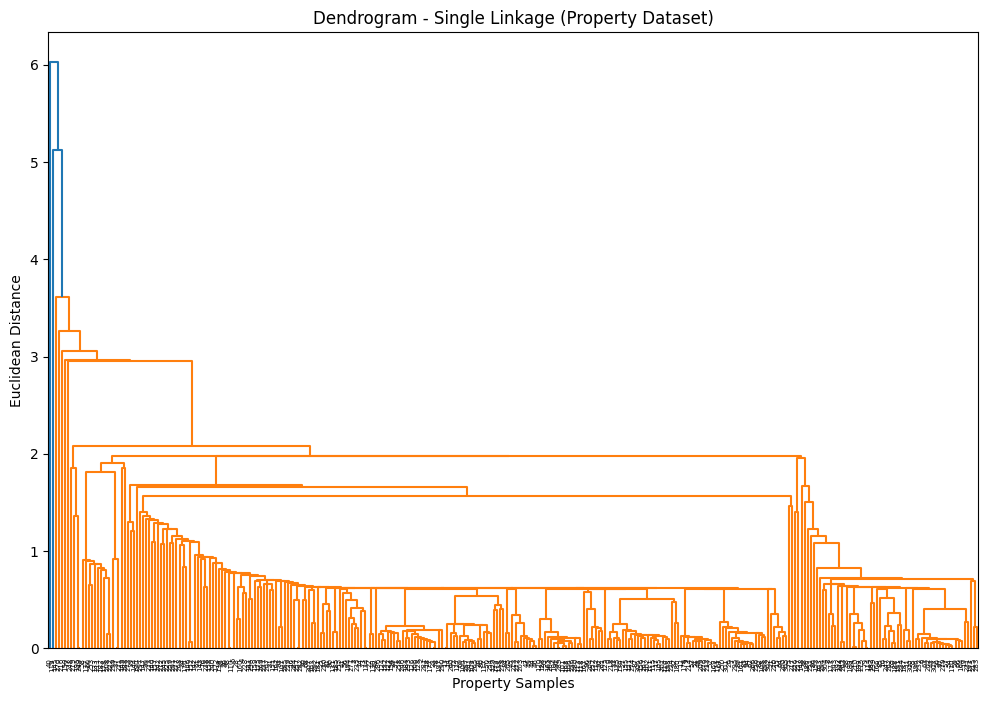

In [139]:
# Single Linkage Method
linked = linkage(df_scaled, method='single', metric='euclidean')

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(12, 8))
dendrogram(linked)
plt.title("Dendrogram - Single Linkage (Property Dataset)")
plt.xlabel("Property Samples")
plt.ylabel("Euclidean Distance")
plt.show()


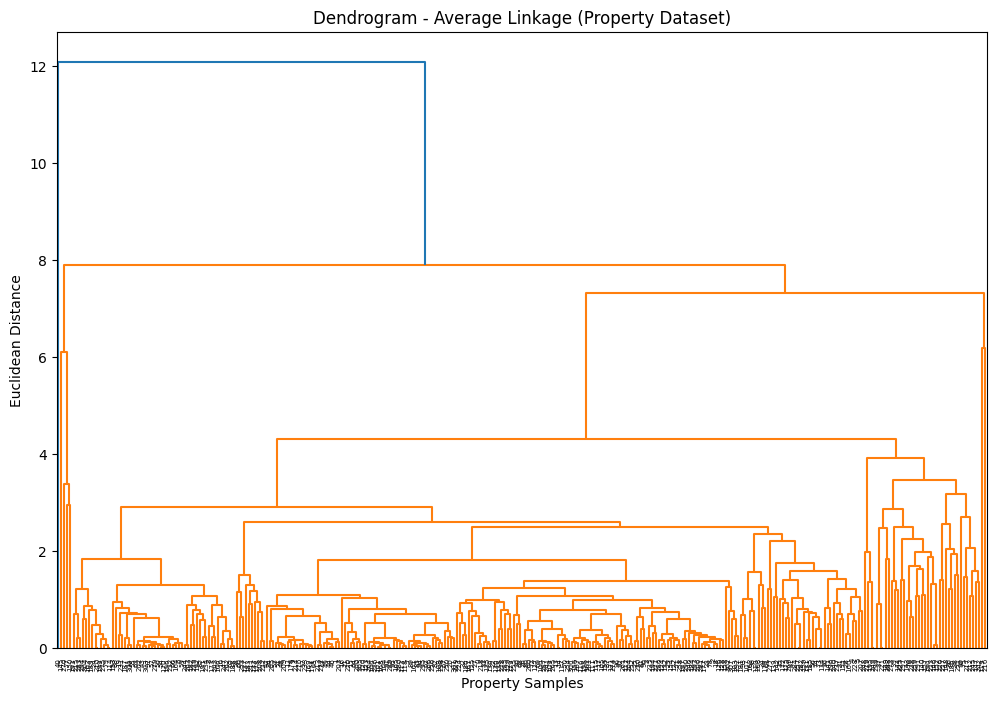

In [140]:
# Average Linkage Method
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(12, 8))
dendrogram(linked)
plt.title("Dendrogram - Average Linkage (Property Dataset)")
plt.xlabel("Property Samples")
plt.ylabel("Euclidean Distance")
plt.show()


## Hierarchical Clustering Model

In [141]:
# Hierarchical Clustering - Model 1 (Best Combination)
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [142]:
# Evaluation - Silhouette Score for Model 1 (Best Combination)
ss = silhouette_score(df_scaled, y_hc)
print("Silhouette Score (Model 1 - Best Combination):", ss)

Silhouette Score (Model 1 - Best Combination): 0.7543687625770334


## Dendogram Visualization for Hierarchical Clustering Model

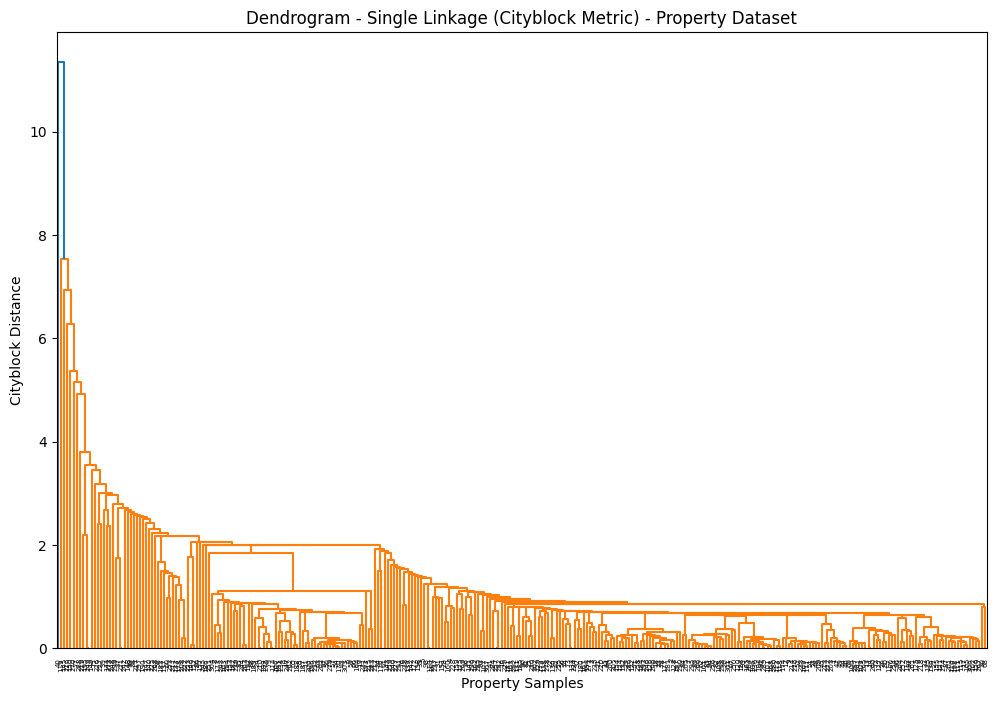

In [145]:
# Fix for unsupported distance metric in scipy linkage
# 'linkage' only supports a limited set of metrics like 'euclidean', 'cityblock', 'cosine', etc.
# Replace 'manhattan' with 'cityblock' if needed

valid_metric = 'cityblock' if best_metric == 'manhattan' else best_metric
if best_linkage == 'ward':
    valid_metric = 'euclidean'

# Dendrogram for Model 1 (Best Combination)
linked = linkage(df_scaled, method=best_linkage, metric=valid_metric)

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked)
plt.title(f"Dendrogram - {best_linkage.capitalize()} Linkage ({valid_metric.capitalize()} Metric) - Property Dataset")
plt.xlabel("Property Samples")
plt.ylabel(f"{valid_metric.capitalize()} Distance")
plt.show()


## Merge with the original data

In [147]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah,Agglo
0,Standard,11,240,300,4,3,2,3500000000,0,3,2,0,0
1,Below Standard,100,30,60,2,1,2,287799000,0,3,2,1,0
2,Standard,48,170,170,5,4,2,2699999999,0,1,0,0,0
3,Sangat Premium,48,187,250,5,5,2,3100000000,0,3,2,0,0
4,Premium,48,350,600,5,5,2,5000000000,0,0,2,0,0


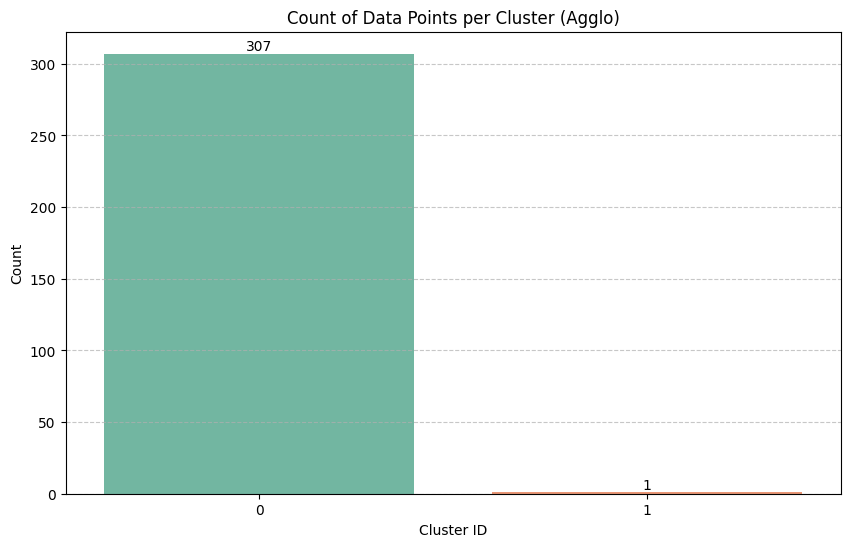

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

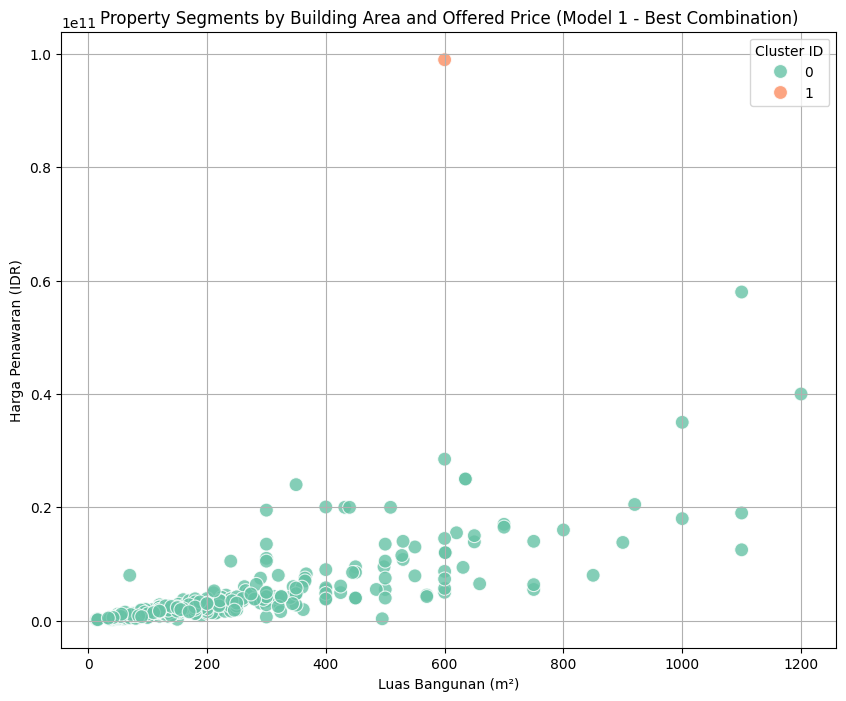

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if the cluster column exists, if not, recreate it
if 'Cluster_Model1' not in df.columns:
    agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
    y_hc = agglo.fit_predict(df_scaled)
    df['Cluster_Model1'] = y_hc

# Scatter plot for Property Segments
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Luas Bangunan', y='Harga Penawaran', hue='Cluster_Model1', palette='Set2', s=100, alpha=0.8)
plt.title('Property Segments by Building Area and Offered Price (Model 1 - Best Combination)')
plt.xlabel('Luas Bangunan (m²)')
plt.ylabel('Harga Penawaran (IDR)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()


In [154]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Luas Tanah'
y_col = 'Luas Bangunan'
z_col = 'Harga Penawaran'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Cluster_Model1'].astype(str),  # Color points by Cluster_Model1 cluster
                    title='Interactive 3D Scatter Plot of Properties by Cluster (Model 1 - Best Combination)')

fig.show()


## Statistical Summary for each cluster

In [155]:
# Group the data by cluster and calculate summary statistics for each cluster
cluster_summary = df.groupby('Cluster_Model1').agg({
    'Nama Daerah': 'first',
    'Luas Tanah': ['mean', 'std', 'min', 'max'],
    'Luas Bangunan': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar Mandi': ['mean', 'std', 'min', 'max'],
    'Tingkat/Lantai ': ['mean', 'std', 'min', 'max'],
    'Harga Penawaran': ['mean', 'std', 'min', 'max'],
})

cluster_summary = cluster_summary.rename_axis('Cluster')
cluster_summary


Nama Daerah  Luas Tanah                        Luas Bangunan  \
              first        mean         std  min   max          mean   
Cluster                                                                
0                11  225.736156  201.019246   14  1561    265.602606   
1                30  600.000000         NaN  600   600    600.000000   

                               Jumlah Kamar  ... Jumlah Kamar Mandi      \
                std  min   max         mean  ...                min max   
Cluster                                      ...                          
0        212.655015   14  1200     4.267101  ...                  1  13   
1               NaN  600   600     7.000000  ...                  5   5   

        Tingkat/Lantai                    Harga Penawaran                \
                   mean       std min max            mean           std   
Cluster                                                                   
0              1.843648  0.506478   1   4    4.708159e+09  6.351742e+09   
1              1.000000       NaN   1   1    9.900000e+10           NaN   

                                   
                 min          max  
Cluster                            
0          160000000  58000000000  
1        99000000000  99000000000  

[2 rows x 25 columns]

Implikasi Manajerial Berdasarkan Hasil Clustering

Cluster analysis is a crucial tool for segmenting the property market based on property characteristics such as area size, price, and the number of bedrooms or bathrooms. Each identified segment comes with a distinct target market profile, key metrics, and tailored marketing and sales strategies.


Primary Market Segmentation

The market can generally be segmented into several main categories:

Premium/Luxury Segment: Properties in this segment are typically characterized by large land and building areas, very high offered prices, and numerous bedrooms and bathrooms. The primary target market for this segment consists of high-income families and investors. Therefore, the marketing strategy must emphasize exclusivity, location, and luxury amenities. Key metrics include price per square meter, Return on Investment (ROI), and appreciation potential.




Mid-Range/Standard Segment: This segment encompasses properties with moderate size and price, typical for residential areas. The marketing strategy here should focus on value, financing options, and family-friendly features to attract middle-class families and first-time buyers. Relevant metrics are the affordability index and mortgage accessibility.



Entry-Level/Compact Segment: Aimed at young professionals, small families, or renters, properties in this segment tend to have a smaller area, a lower price point, and fewer rooms. Marketing should highlight affordability and location convenience as primary benefits.


Investment/Commercial Potential: This category focuses on properties that may have unique value due to house position (e.g., hook or roadside) or zoning, appealing to investors and developers. The strategy is to emphasize the development potential and commercial viability of the property.


Actionable Insights from Cluster Analysis

The insights derived from the clusters lead to actionable recommendations for various stakeholders:

For Real Estate Agents: Cluster data should be used to match clients with the appropriate segment based on their budget and needs. Agents can also utilize cluster statistics for comparative market analysis (CMA) and create more targeted property listings.

For Property Developers: Developers can use this data to identify underserved clusters and strategically plan new developments that fill market gaps. They should also set development standards that align with the characteristics of the targeted cluster.

For Investors: Investors can apply these insights to diversify their portfolio across various clusters, focusing on segments that promise the best rental yields or capital appreciation, and using cluster trends to inform their buy/sell timing decisions.

Overall, leveraging cluster statistics (such as mean, median, or mode) allows for competitive price setting and helps identify properties that may be undervalued (underpriced) within premium clusters. Furthermore, monitoring the movement of properties between clusters over time is crucial for evaluating market saturation and identifying emerging market opportunities.